In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración de visualización.
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

In [9]:
# Definimos la ruta de los archivos.
ruta_data = '../data/sin-procesar/'

# Cargamos los datos.
df_true = pd.read_csv(os.path.join(ruta_data, 'True.csv'))
df_fake = pd.read_csv(os.path.join(ruta_data, 'Fake.csv'))

In [10]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
# Agregamos una columna de etiqueta.
df_true['label'] = 'real'
df_fake['label'] = 'fake'

In [13]:
# Unimos los datasets.
df = pd.concat([df_true, df_fake], ignore_index = True)

df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real


In [14]:
# Información general del dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [15]:
# Comprobamos valores nulos.
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

C:\Users\PrancherC\AppData\Local\Temp\ipykernel_9760\675040875.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'label', palette = 'viridis')


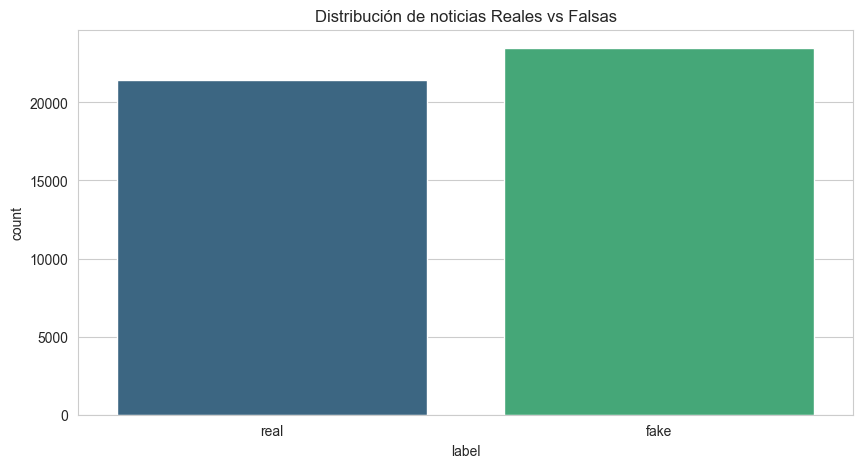

In [16]:
sns.countplot(data = df, x = 'label', palette = 'viridis')
plt.title('Distribución de noticias Reales vs Falsas')

plt.show()

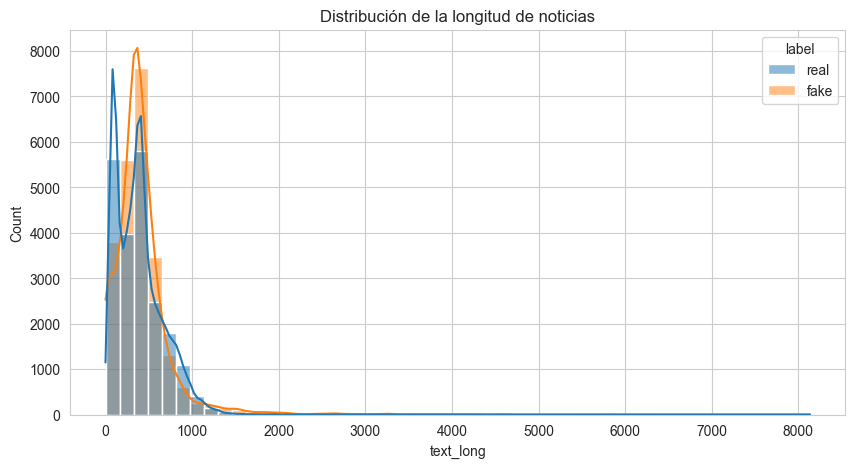

In [17]:
# Calculamos la longitud de cada noticia.
df['text_long'] = df['text'].apply(lambda x: len(str(x).split()))

# Visualizamos la distribución de la longitud de textos.
sns.histplot(df, x = 'text_long', hue = 'label', bins = 50, kde = True)
plt.title('Distribución de la longitud de noticias')

plt.show()